In [1]:
import os 
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,12)})
from pybaseball import plot_stadium

In [71]:
player_pos = pd.read_csv("SMT-Data-Challenge\\player_pos.csv")
player_pos[player_pos['play_id']==1]

,game_str,play_id,timestamp,player_position,field_x,field_y
0,1900_01_TeamKJ_TeamB,1,20549.0,1,-1.1805,56.9901
1,1900_01_TeamKJ_TeamB,1,20582.0,1,-1.1394,56.8299
2,1900_01_TeamKJ_TeamB,1,20615.0,1,-1.0986,56.6691
3,1900_01_TeamKJ_TeamB,1,20648.0,1,-1.0572,56.5080
4,1900_01_TeamKJ_TeamB,1,20681.0,1,-1.0155,56.3460
...,...,...,...,...,...,...
20092947,1903_32_TeamNB_TeamA1,1,4088.0,19,-73.9791,55.1832
20092948,1903_32_TeamNB_TeamA1,1,4138.0,19,-73.9842,55.1841
20092949,1903_32_TeamNB_TeamA1,1,4188.0,19,-73.9884,55.1853
20092950,1903_32_TeamNB_TeamA1,1,4238.0,19,-73.9923,55.1859


In [65]:
fielder_pos = player_pos[
    (player_pos['player_position'] <= 9) & 
    (player_pos['player_position'] >= 1)]
mapping = {1:'pitcher',
           2:'catcher',
           3:'first baseman',
           4:'second baseman',
           5:'third baseman',
           6:'shortstop',
           7:'left field',
           8:'center field',
           9:'right field'}
fielder_pos['player_position'] = fielder_pos['player_position'].map(mapping);
fielder_pos

<ipython-input-65-a382cd82f866>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fielder_pos['player_position'] = fielder_pos['player_position'].map(mapping);


,game_str,play_id,timestamp,player_position,field_x,field_y
0,1900_01_TeamKJ_TeamB,1,20549,pitcher,-1.1805,56.9901
1,1900_01_TeamKJ_TeamB,1,20582,pitcher,-1.1394,56.8299
2,1900_01_TeamKJ_TeamB,1,20615,pitcher,-1.0986,56.6691
3,1900_01_TeamKJ_TeamB,1,20648,pitcher,-1.0572,56.5080
4,1900_01_TeamKJ_TeamB,1,20681,pitcher,-1.0155,56.3460
...,...,...,...,...,...,...
499995,1900_04_TeamKK_TeamB,56,1659408,right field,121.9098,202.3734
499996,1900_04_TeamKK_TeamB,56,1659441,right field,121.8684,202.2666
499997,1900_04_TeamKK_TeamB,56,1659474,right field,121.8255,202.1619
499998,1900_04_TeamKK_TeamB,56,1659507,right field,121.7814,202.0590


In [17]:
def label_point(x, y, val, ax):
    a = pd.concat({'x':x, 'y':y, 'val':val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+1, point['y']+1, str(point['val']), size=10)

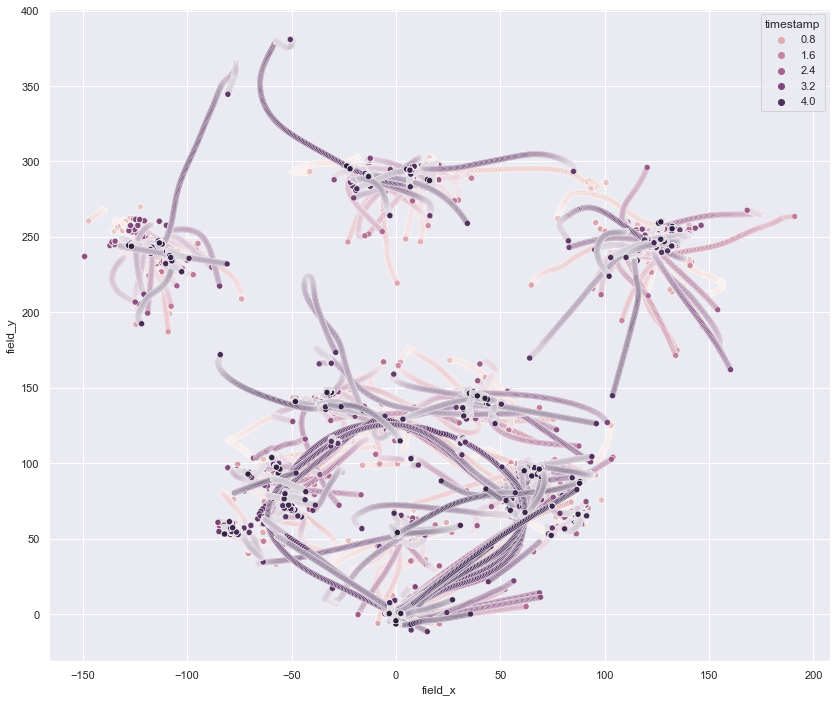

In [18]:
ax = sns.scatterplot(x='field_x', y='field_y', hue='timestamp', data=player_pos)
# plot_stadium(team='generic', title="plot", axis=ax.axes)
# label_point(play_1.field_x, play_1.field_y, play_1.player_position, plt.gca())

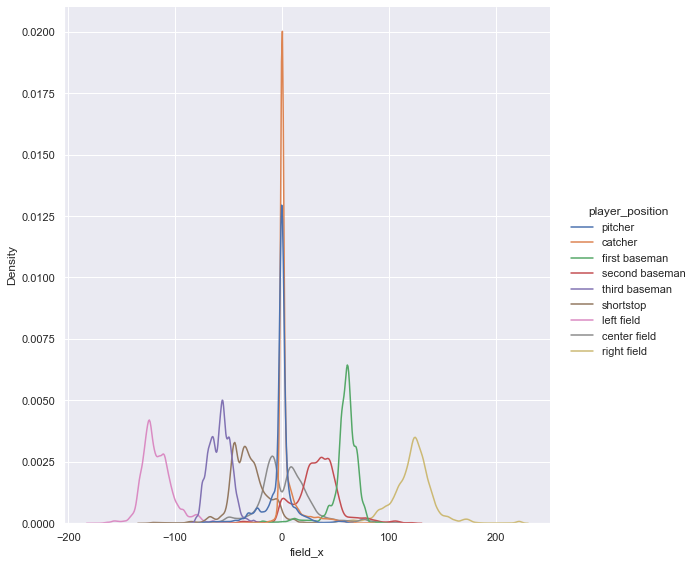

In [12]:
ax = sns.displot(fielder_pos, x="field_x", hue="player_position", kind="kde", height=8)

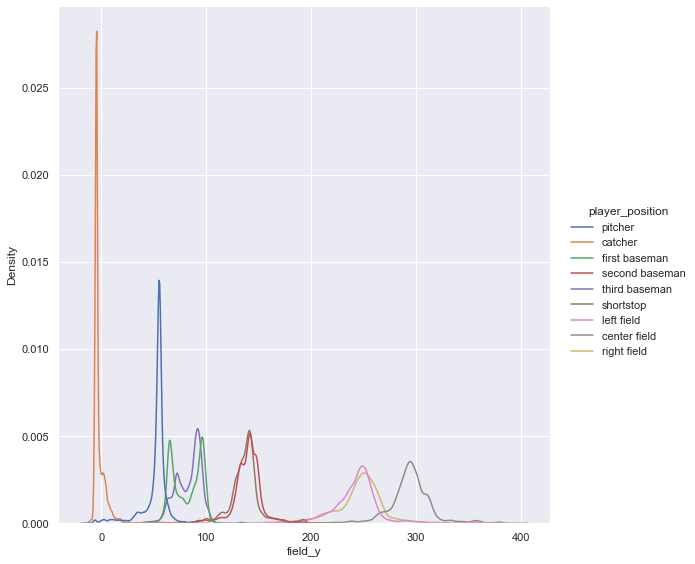

In [13]:
ax = sns.displot(fielder_pos, x="field_y", hue="player_position", kind="kde", height=8)

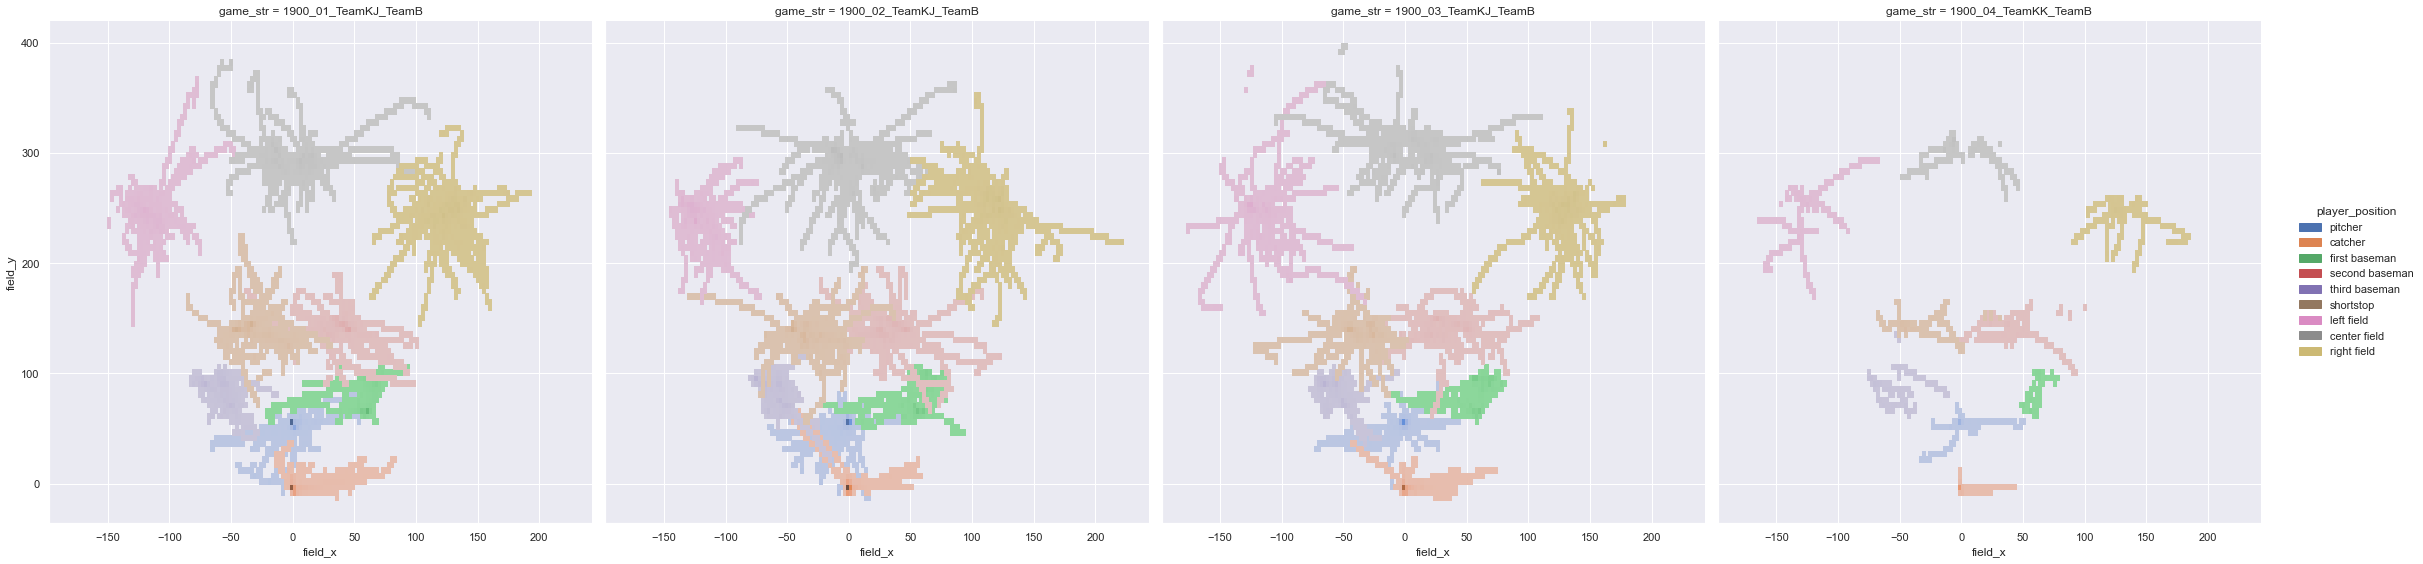

In [72]:
ax = sns.displot(fielder_pos, x="field_x", y="field_y", hue="player_position", height=8, col="game_str")

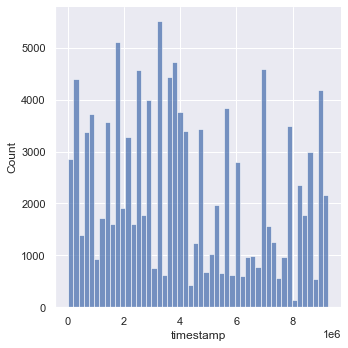

In [60]:
ax = sns.displot(fielder_pos[fielder_pos['game_str']=='1900_01_TeamKJ_TeamB'], x="timestamp")

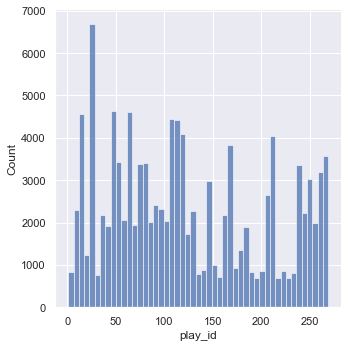

In [61]:
ax = sns.displot(fielder_pos[fielder_pos['game_str']=='1900_01_TeamKJ_TeamB'], x="play_id")

In [74]:
fielder_pos[fielder_pos['game_str']=='1900_04_TeamKK_TeamB']

,game_str,play_id,timestamp,player_position,field_x,field_y
472378,1900_04_TeamKK_TeamB,1,11628,pitcher,0.3663,59.3475
472379,1900_04_TeamKK_TeamB,1,11661,pitcher,0.3837,59.3247
472380,1900_04_TeamKK_TeamB,1,11694,pitcher,0.4014,59.3019
472381,1900_04_TeamKK_TeamB,1,11727,pitcher,0.4191,59.2791
472382,1900_04_TeamKK_TeamB,1,11760,pitcher,0.4365,59.2563
...,...,...,...,...,...,...
499995,1900_04_TeamKK_TeamB,56,1659408,right field,121.9098,202.3734
499996,1900_04_TeamKK_TeamB,56,1659441,right field,121.8684,202.2666
499997,1900_04_TeamKK_TeamB,56,1659474,right field,121.8255,202.1619
499998,1900_04_TeamKK_TeamB,56,1659507,right field,121.7814,202.0590
